Mounted at /content/gdrive
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  Satisfaction

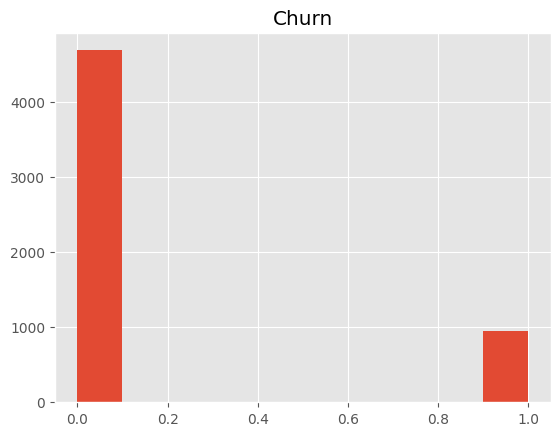

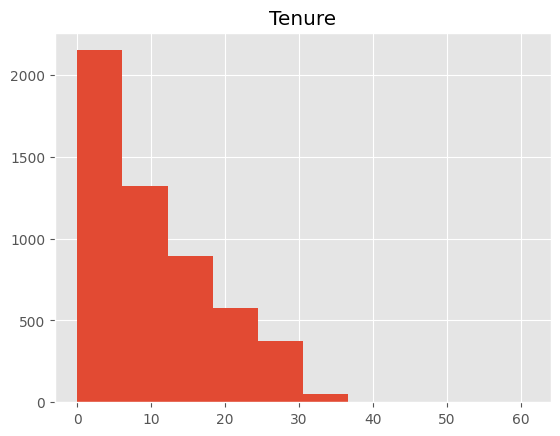

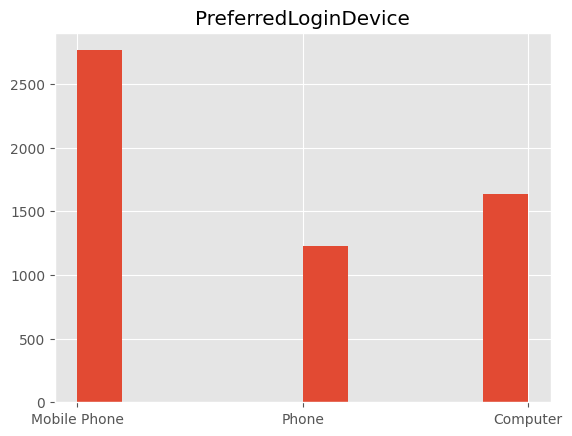

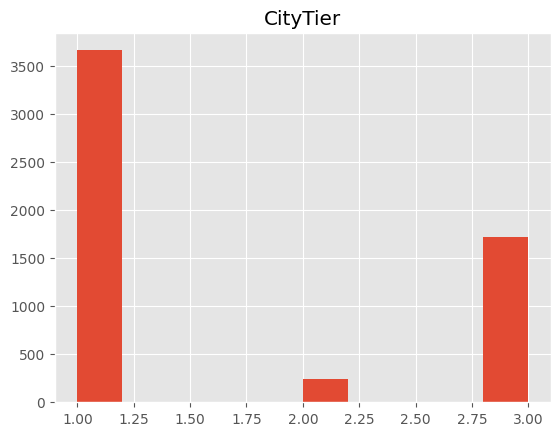

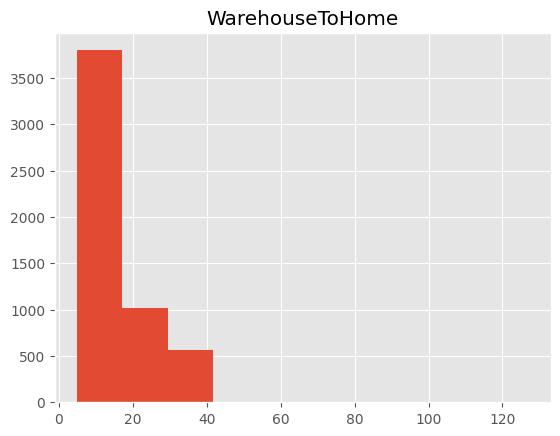

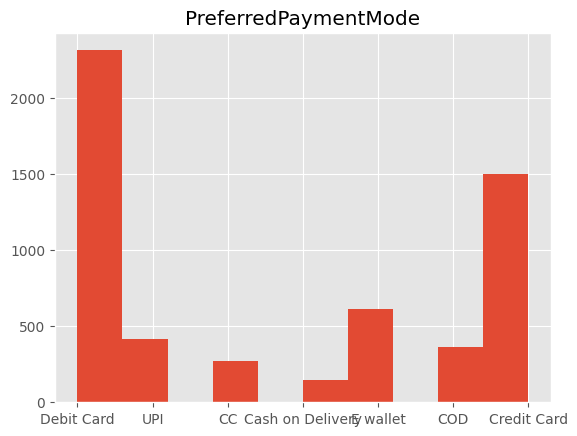

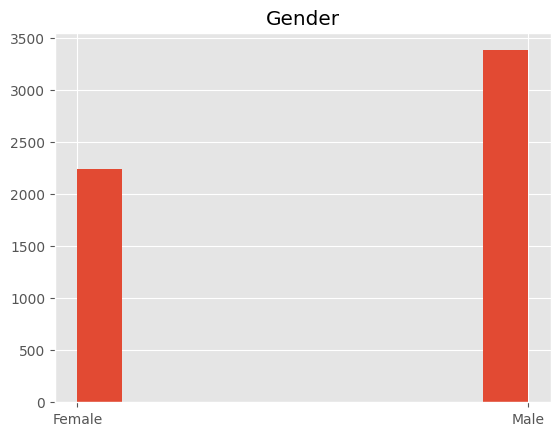

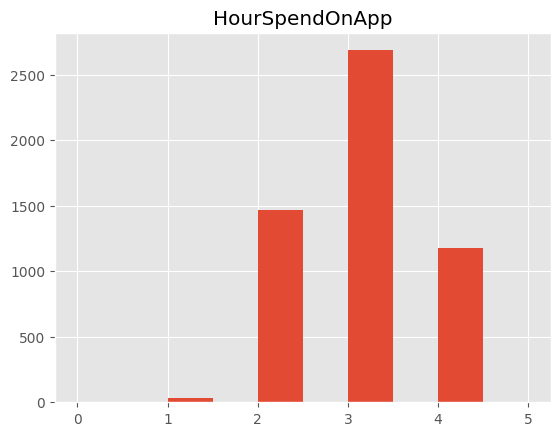

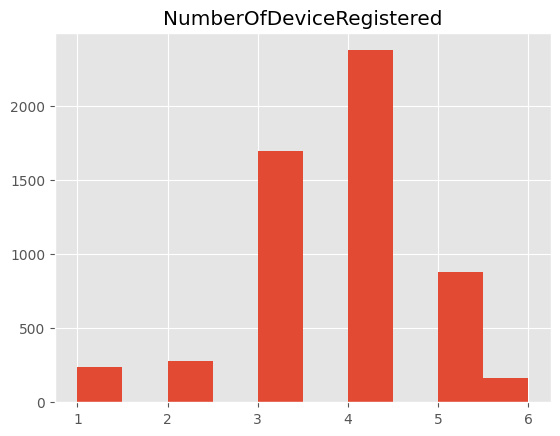

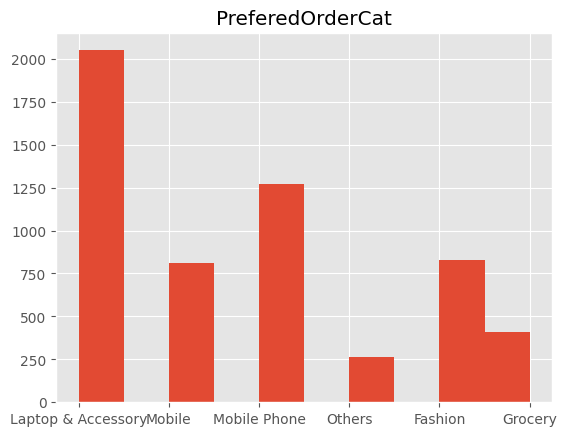

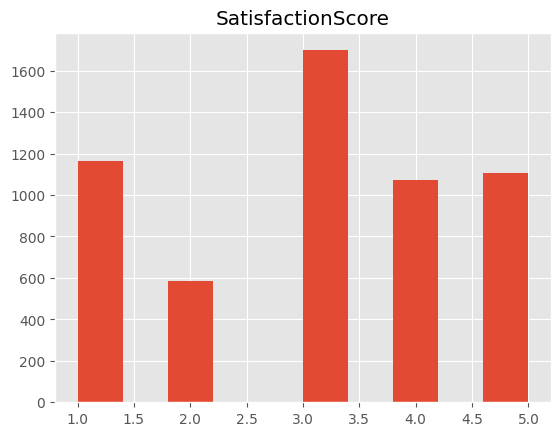

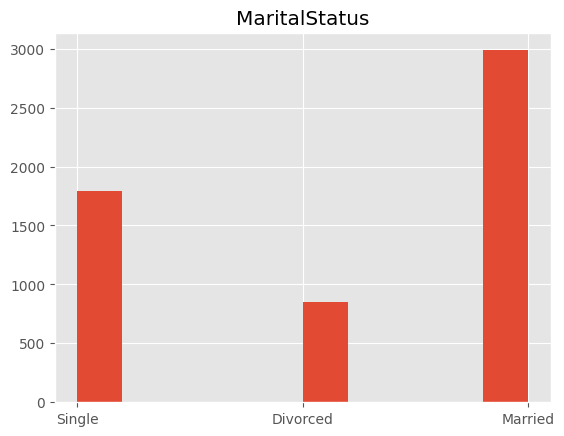

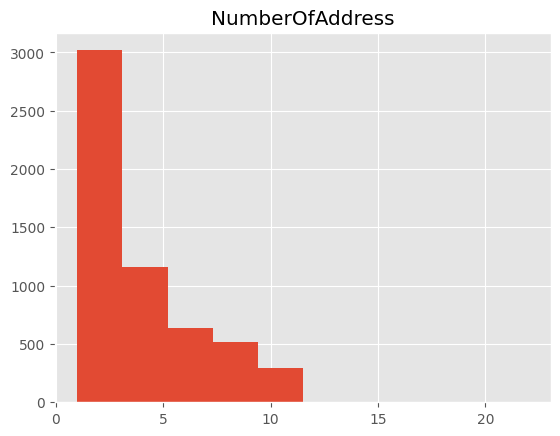

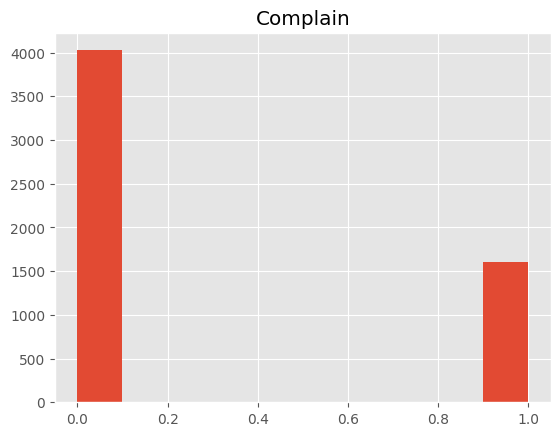

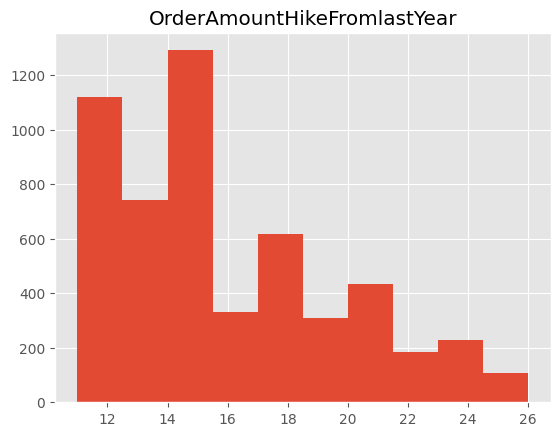

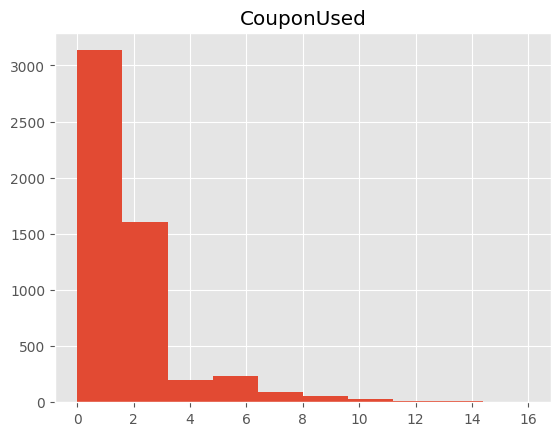

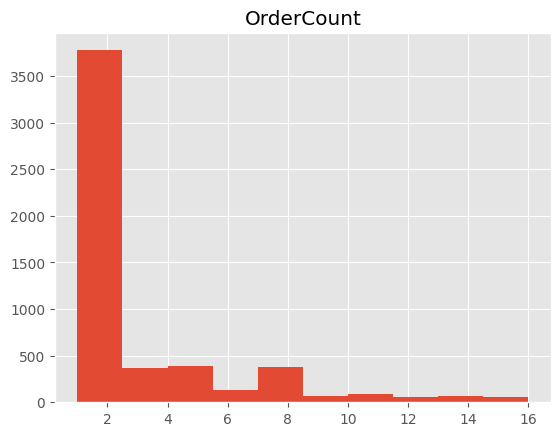

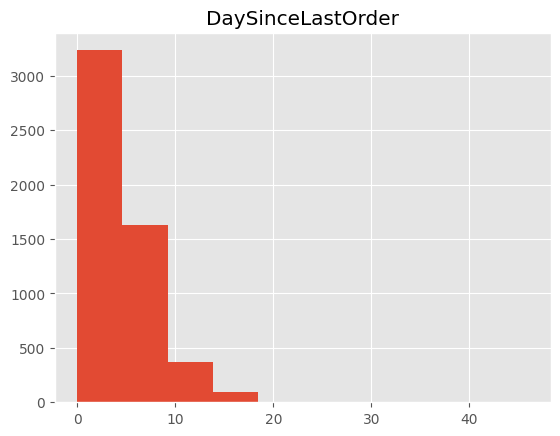

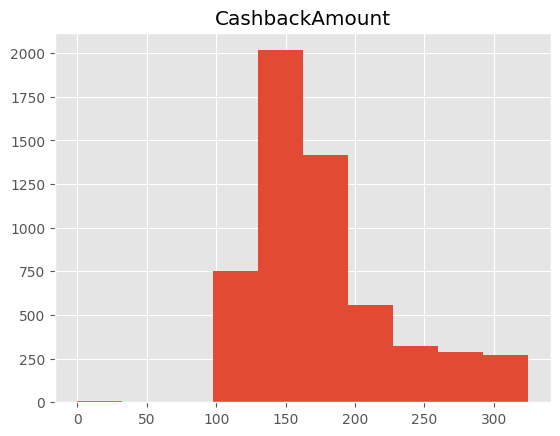

(5630, 19)
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

plt.style.use("ggplot")

np.random.seed(0)

from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_excel("/content/gdrive/My Drive/churn_data.xlsx", sheet_name = 1)

print(data.head())
print(data.shape)
print(data.info())
print(data.describe())

# dropping CustomerID, since we don't need this for subsequence analysis
data = data.drop('CustomerID', axis=1)

for column in data:
  plt.hist(data[column], bins=10)
  plt.title(column)
  plt.show()


print(data.shape)

print(data.isnull().sum())

significant_features = []



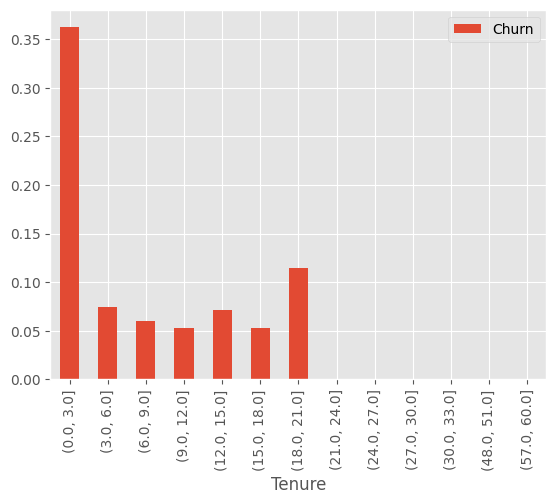

Feature 'Tenure' has a statistically significant association with 'Churn' (p-value: 0.0000).


In [2]:
max_tenure = data['Tenure'].max()
min_tenure = data['Tenure'].min()
# Assuming that here Tenure is in months - input file doesn't mention the unit.
# We would like to see how Churn is affected by Tenure of users with the company.

# Arranging tenure data into buckets of 3 months to see how it looks like.
# 35% of users Churn within their first 3 months. Churn drops significantly after first 3 months.
# From CX perspective, we need to focus on retaining new customers, i.e. customers who has not completed their first 3 months. So they need to be targeted with positive campaign.

data_pivot = data.pivot_table(values='Churn', index=pd.cut(data['Tenure'], np.arange(min_tenure, max_tenure, 3)), aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()

#we would like to see if the association between Tenure and Churn is statistically significant
feature = 'Tenure'
data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")




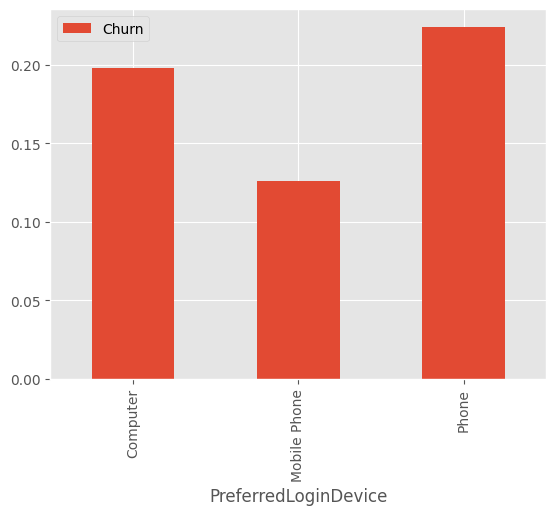

Feature 'PreferredLoginDevice' has a statistically significant association with 'Churn' (p-value: 0.0000).


In [3]:
## It is not clear what is the distinction between Phone and MobilePhone here.
## Customer who use phone to login to application Churned More than customers who used Computer or MobilePhone. 20% or more customers who used Computer or Phone Churned. Engage with customers
## who are using these devices (Phone/Computer)
data_pivot = data.pivot_table(values='Churn', index='PreferredLoginDevice', aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()

#we would like to see if the association between PreferredLoginDevice and Churn is statistically significant
feature = 'PreferredLoginDevice'
data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")








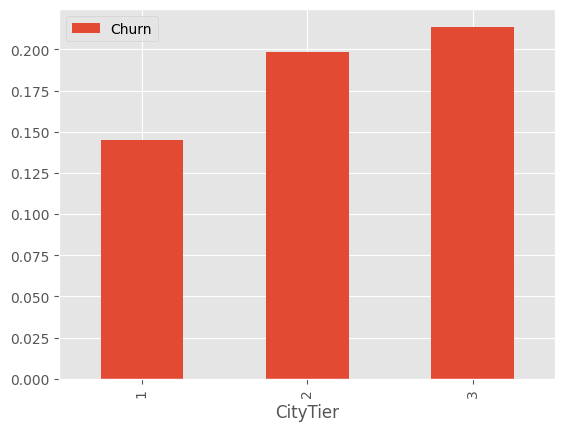

Feature 'CityTier' has a statistically significant association with 'Churn' (p-value: 0.0000).


In [4]:
# CityTier shows a consistent pattern, higher the city tier, higher churn
# From CX perspective, engage more with CityTier 2 and CityTier 3 since they are showing 20% or more Churn percentages.
# Also it is noteworthy that CityTier 2 and CityTier 3 are smaller group of customers comparing to CityTier 1. Especially CityTierr 2 represents ~5% of customers, so it is important to understand what issues they have
data_pivot = data.pivot_table(values='Churn', index='CityTier', aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()

#we would like to see if the association between CityTier and Churn is statistically significant
feature = 'CityTier'
data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")





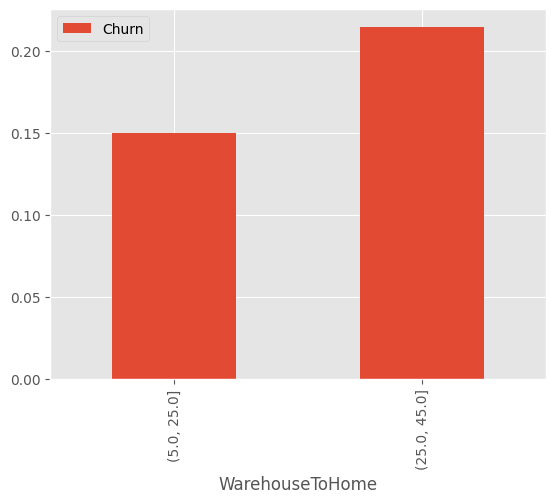

Feature 'WarehouseToHome' has a statistically significant association with 'Churn' (p-value: 0.0000).


In [5]:
max_home_distance = data['WarehouseToHome'].max()
min_home_distance = data['WarehouseToHome'].min()


# Higher distance from home to warehouse increases churn. 15% of users for whom Warehouse is within 5 to 25 mile from their home Churned, whereas more than 20% users Churned when the
# Warehouse is within 25 to 45 miles away from home. This is intuitive because distance from Warehouse may increase shipping delay/cost.
# From CX perspective, users who live far from the warehouse could be incentivized/engaged to prevent their high likelihood of Churn
data_pivot = data.pivot_table(values='Churn', index=pd.cut(data['WarehouseToHome'], np.arange(min_home_distance, max_home_distance, 20)), aggfunc=np.mean)

data_pivot.plot.bar()
plt.show()

#we would like to see if the association between WarehouseToHome and Churn is statistically significant
feature = 'WarehouseToHome'
data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")




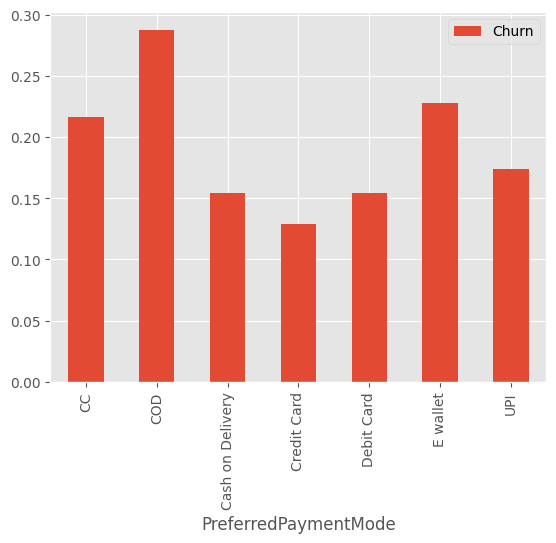

Feature 'PreferredPaymentMode' has a statistically significant association with 'Churn' (p-value: 0.0000).


In [6]:
# PreferredPaymentMode shows variations of Churn behavior. Users who preferred COD as their payment method Churned more (~28%). CC and E-wallet also show more than 20% Churn.
# This should be further investigated to see if those customers face any specific problem with these payment methods (CC, COD and E-wallet) using the application, so those customers should be engaged to learn more.
data_pivot = data.pivot_table(values='Churn', index='PreferredPaymentMode', aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()

#we would like to see if the association between PreferredPaymentMode and Churn is statistically significant
feature = 'PreferredPaymentMode'
data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")





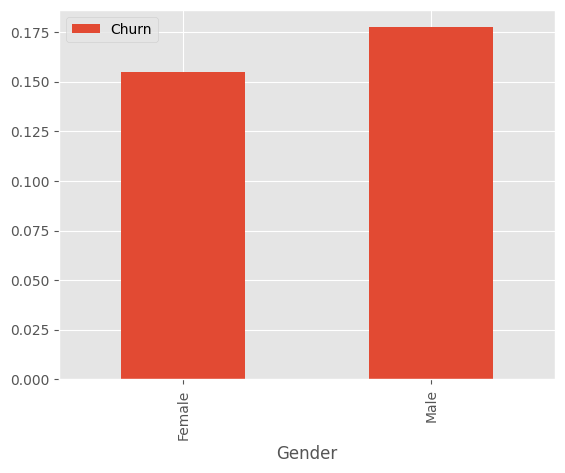

Feature 'Gender' has a statistically significant association with 'Churn' (p-value: 0.0308).


In [7]:
#visualize how churn is distributed across male vs. female. Data shows that Male customers churned more than Female customers.
data_pivot = data.pivot_table(values='Churn', index='Gender', aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()


#we would like to see if the association between Gender and Churn is statistically significant
feature = 'Gender'
data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")



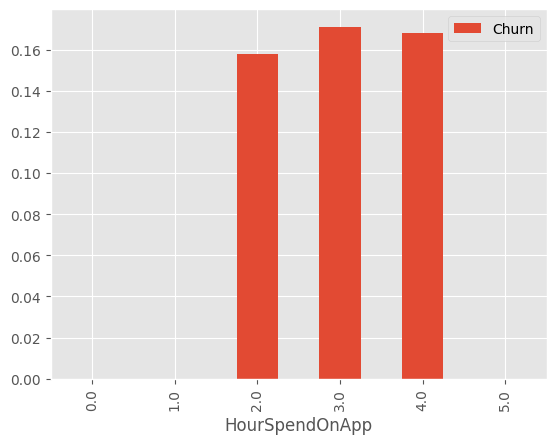

Feature 'HourSpendOnApp' does not have a statistically significant association with 'Churn' (p-value: 0.0916).


In [8]:
## Intuitively we would expect that higher the number of hrs spend on app, users are less likely to churn, but data doesn't show us that. This is counter intuitive.

data_pivot = data.pivot_table(values='Churn', index='HourSpendOnApp', aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()

#we would like to see if the association between HourSpendOnApp and Churn is statistically significant
feature = 'HourSpendOnApp'

data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")





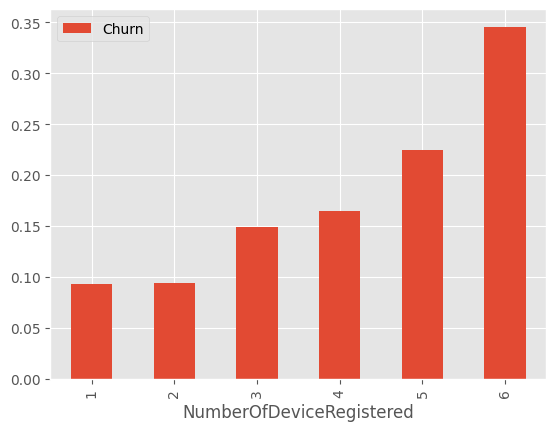

Feature 'NumberOfDeviceRegistered' has a statistically significant association with 'Churn' (p-value: 0.0000).


In [9]:
## This shows a clear pattern, higher the number of registered devices, more likely to churn
## From CX point of view, users with more registered devices should be engaged.
data_pivot = data.pivot_table(values='Churn', index='NumberOfDeviceRegistered', aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()

#we would like to see if the association between NumberOfDeviceRegistered and Churn is statistically significant
feature = 'NumberOfDeviceRegistered'

data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")





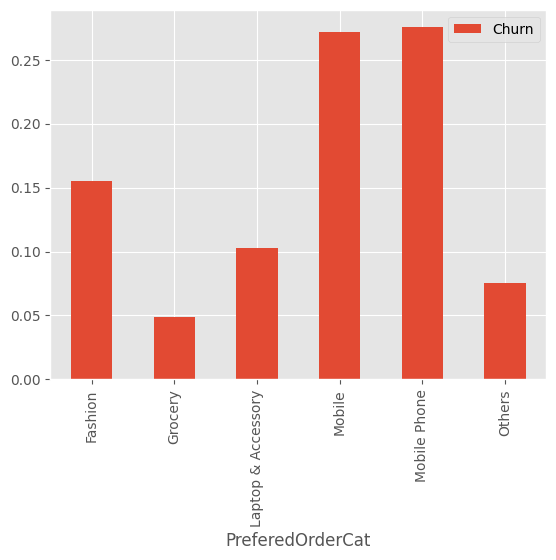

Feature 'PreferedOrderCat' has a statistically significant association with 'Churn' (p-value: 0.0000).


In [10]:
## people who ordered mobile and mobile phones are more likely to churn
data_pivot = data.pivot_table(values='Churn', index='PreferedOrderCat', aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()

#we would like to see if the association between PreferedOrderCat and Churn is statistically significant
feature = 'PreferedOrderCat'

data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")




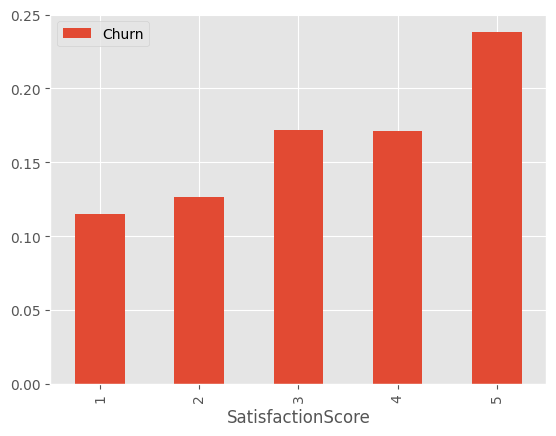

Feature 'SatisfactionScore' has a statistically significant association with 'Churn' (p-value: 0.0000).


In [11]:
# Assuming 1 means most satisfied, data shows that most satisfied customers are less likely to churn (intuitive), however if 1 here means least satisfied, data
# shows counter intuitive
data_pivot = data.pivot_table(values='Churn', index='SatisfactionScore', aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()

#we would like to see if the association between SatisfactionScore and Churn is statistically significant
feature = 'SatisfactionScore'

data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")



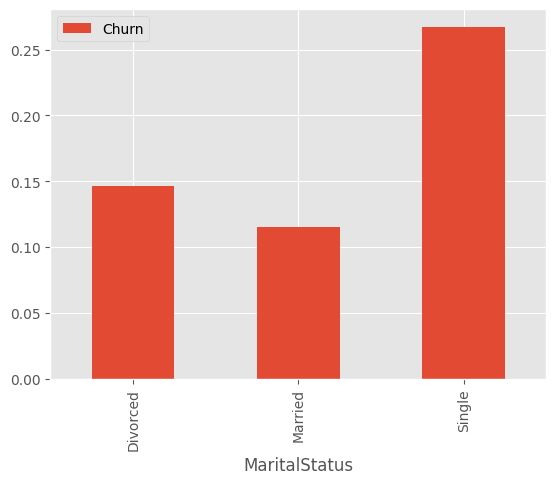

Feature 'MaritalStatus' has a statistically significant association with 'Churn' (p-value: 0.0000).


In [12]:
## data shows married people are less likely to churn, whereas single individuals are more likely to churn. Perhaps they don't have consistent purchase behaviors using the app
data_pivot = data.pivot_table(values='Churn', index='MaritalStatus', aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()

#we would like to see if the association between MaritalStatus and Churn is statistically significant
feature = 'MaritalStatus'

data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")



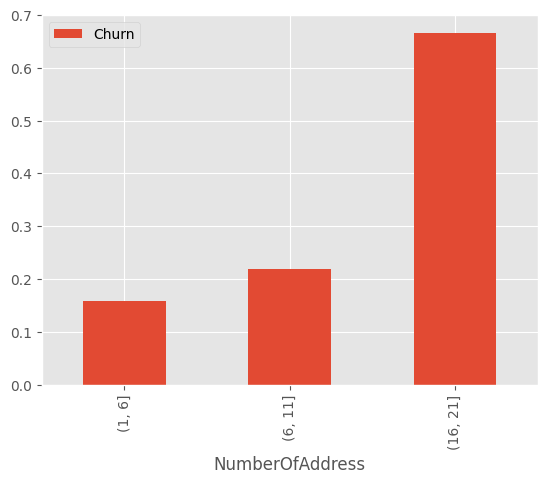

Feature 'NumberOfAddress' has a statistically significant association with 'Churn' (p-value: 0.0000).


In [13]:
max_num_address = data['NumberOfAddress'].max()
min_num_address = data['NumberOfAddress'].min()

### people who use more number of addresses are more likely to churn. This is probably they are not very stable customers.
data_pivot = data.pivot_table(values='Churn', index=pd.cut(data['NumberOfAddress'], np.arange(min_num_address, max_num_address, 5)), aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()

#we would like to see if the association between NumberOfAddress and Churn is statistically significant
feature = 'NumberOfAddress'

data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")




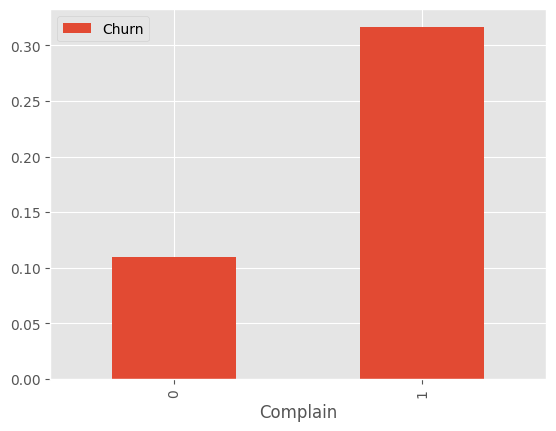

Feature 'Complain' has a statistically significant association with 'Churn' (p-value: 0.0000).


In [14]:
# complain has a very clear relationship with churn (intuitive). Customers who complained are more likely to churn
data_pivot = data.pivot_table(values='Churn', index='Complain', aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()

#we would like to see if the association between Complain and Churn is statistically significant
feature = 'Complain'

data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")





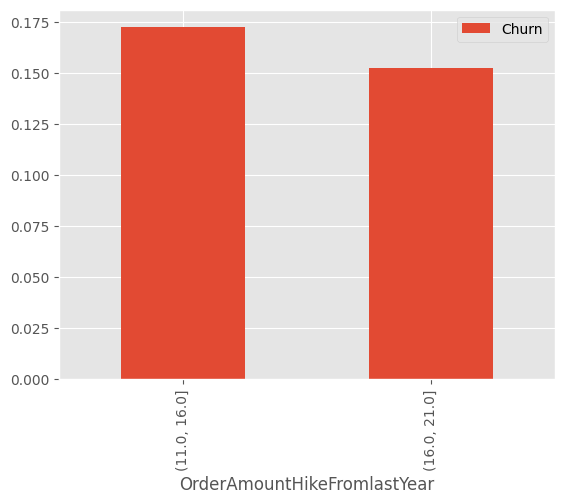

Feature 'OrderAmountHikeFromlastYear' has a statistically significant association with 'Churn' (p-value: 0.0019).


In [15]:
# This shows that people churn less when their order amount hikes more from last year. Order amount hike shows increased engagement with the app, and it is a clear indicator of engagement.
# From CX standpoint, users who show less hikes in order amount should be engaged.
max_order_amount_hike = data['OrderAmountHikeFromlastYear'].max()
min_order_amount_hike = data['OrderAmountHikeFromlastYear'].min()

data_pivot = data.pivot_table(values='Churn', index=pd.cut(data['OrderAmountHikeFromlastYear'], np.arange(min_order_amount_hike, max_order_amount_hike, 5)), aggfunc=np.mean)

data_pivot.plot.bar()
plt.show()

#we would like to see if the association between OrderAmountHikeFromlastYear and Churn is statistically significant
feature = 'OrderAmountHikeFromlastYear'

data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")





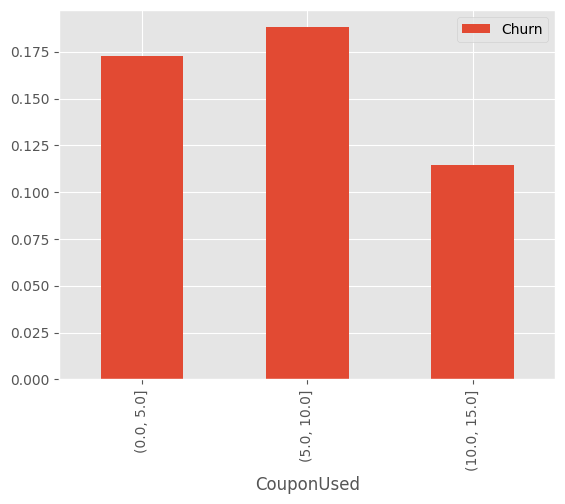

Feature 'CouponUsed' does not have a statistically significant association with 'Churn' (p-value: 0.5769).


In [16]:
## Customers using more coupons are engaged customers, they are less likely to churn. However, we don't see a consistent pattern from the data.

max_coupon_used = data['CouponUsed'].max()
min_coupon_used = data['CouponUsed'].min()

data_pivot = data.pivot_table(values='Churn', index=pd.cut(data['CouponUsed'], np.arange(min_coupon_used, max_coupon_used, 5)), aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()

#we would like to see if the association between CouponUsed and Churn is statistically significant
feature = 'CouponUsed'

data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")





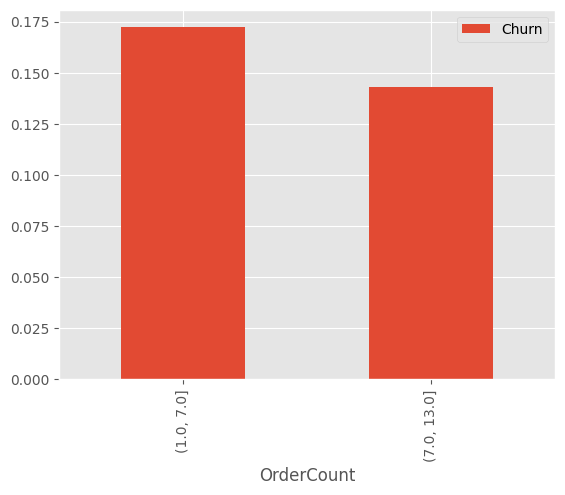

Feature 'OrderCount' has a statistically significant association with 'Churn' (p-value: 0.0041).


In [17]:
## People who are putting more orders (more engaged) are churning less. This is intuitive.
max_order_count = data['OrderCount'].max()
min_order_count = data['OrderCount'].min()

data_pivot = data.pivot_table(values='Churn', index=pd.cut(data['OrderCount'], np.arange(min_order_count, max_order_count, 6)), aggfunc=np.mean)
#data_pivot = data.pivot_table(values='Churn', index='OrderCount', aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()

#we would like to see if the association between OrderCount and Churn is statistically significant
feature = 'OrderCount'

data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")




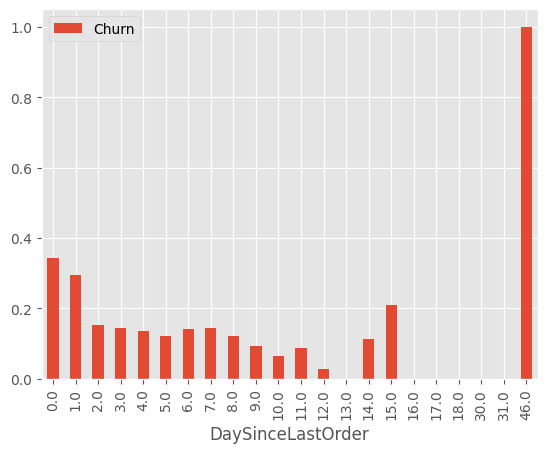

Feature 'DaySinceLastOrder' has a statistically significant association with 'Churn' (p-value: 0.0000).


In [18]:
## Intuitively, users who did not put any order recently are more likely to churn. However, we don't see consistent pattern here. Rightmost bar is an outlier.

## People who are putting more orders (more engaged) are churning less. This is intuitive.
#max_day_since_last_order = data['DaySinceLastOrder'].max()
#min_day_since_last_order = data['DaySinceLastOrder'].min()
#data_pivot = data.pivot_table(values='Churn', index=pd.cut(data['DaySinceLastOrder'], np.arange(min_day_since_last_order, min_day_since_last_order, 6)), aggfunc=np.mean)

data_pivot = data.pivot_table(values='Churn', index='DaySinceLastOrder', aggfunc=np.mean)
data_pivot.plot.bar()
plt.show()

#we would like to see if the association between DaySinceLastOrder and Churn is statistically significant
feature = 'DaySinceLastOrder'

data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")





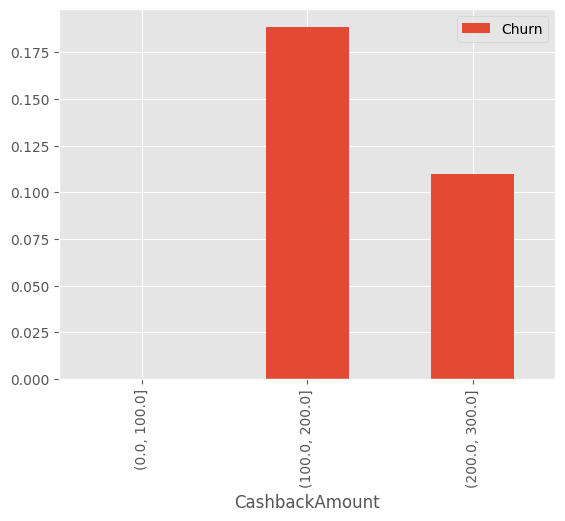

Feature 'CashbackAmount' has a statistically significant association with 'Churn' (p-value: 0.0000).


In [19]:
## People who are getting higher cash back are churning less, this is intuitive
max_cash_back_amount = data['CashbackAmount'].max()
min_cash_back_amount = data['CashbackAmount'].min()

data_pivot = data.pivot_table(values='Churn', index=pd.cut(data['CashbackAmount'], np.arange(min_cash_back_amount, max_cash_back_amount, 100)), aggfunc=np.mean)

data_pivot.plot.bar()
plt.show()

#we would like to see if the association between CashbackAmount and Churn is statistically significant
feature = 'CashbackAmount'

data_crosstab = pd.crosstab(data[feature], data['Churn'])
chi2_score, p_value, _, _ = chi2_contingency(data_crosstab)

if p_value < 0.05:
    print(f"Feature '{feature}' has a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")
    significant_features.append(feature)
else:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn' (p-value: {p_value:.4f}).")





In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text


print(significant_features)
print(len(significant_features))

#from google.colab import drive
#drive.mount('/content/gdrive')
#data = pd.read_excel("/content/gdrive/My Drive/churn_data.xlsx", sheet_name = 1)
#data = data.drop('CustomerID', axis=1)

print(data.shape)

y = data['Churn']
data = data.drop('Churn', axis=1)
print(data.shape)

#all_features = data.columns.tolist()
all_features = ['Gender', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode',
                        'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
                        'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

for feature in all_features:
  if feature not in significant_features:
    print(f"Feature '{feature}' does not have a statistically significant association with 'Churn'.")
    data = data.drop(feature, axis=1)

print(data.shape)
from sklearn.impute import SimpleImputer

categorical_features = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
significant_categorical_features = []

for feature in categorical_features:
  if feature in significant_features:
    significant_categorical_features.append(feature)

print(significant_categorical_features)

# Encode categorical features
label_encoder = LabelEncoder()

for feature in significant_categorical_features:
  data[feature] = label_encoder.fit_transform(data[feature])
  label_encode_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
  print(label_encode_name_mapping)


# Create an imputer to handle missing values
imputer = SimpleImputer(strategy="mean")

# Impute missing values in the data
data = imputer.fit_transform(data)

X = data
print(X.shape)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth = 9)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print(export_text(model, feature_names=significant_features))







['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
16
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(5630, 19)
(5630, 18)
Feature 'HourSpendOnApp' does not have a statistically significant association with 'Churn'.
Feature 'CouponUsed' does not have a statistically significant association with 'Churn'.
(5630, 16)
['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
{'Computer': 0, 'Mobile Phone': 1, 'Phone': 2}
{'CC': 0, 'COD': 1, 'Cash on Delivery': 2, 'Credit Card': 3, 'Debit Card': 4, 'E wallet': 5, 'UPI': 6}
{'Female': 0, 'Male': 1}
{'Fashion': 0, 'Grocery': 1, 'Laptop & Accessory': 2, 'Mobile': 3, 'Mobile Phon